# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

A hospital readmission is an episode when a patient who had been discharged from a hospital is admitted again within a specified time interval. Readmission rates have increasingly been used as an outcome measure in health services research and as a quality benchmark for health systems.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [152]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [41]:
hospital_read_df['Hospital Name'].value_counts()

MEMORIAL HOSPITAL                                    35
GOOD SAMARITAN HOSPITAL                              35
MERCY HOSPITAL                                       30
ST JOSEPH HOSPITAL                                   30
ST JOSEPH MEDICAL CENTER                             25
ST MARY'S MEDICAL CENTER                             25
MERCY MEDICAL CENTER                                 25
ST MARYS HOSPITAL                                    20
ST MARY MEDICAL CENTER                               20
DOCTORS HOSPITAL                                     15
GRADY MEMORIAL HOSPITAL                              15
SAINT FRANCIS MEDICAL CENTER                         15
ST VINCENT HOSPITAL                                  15
MERCY REGIONAL MEDICAL CENTER                        15
MARION GENERAL HOSPITAL                              15
SACRED HEART HOSPITAL                                15
NORTHWEST MEDICAL CENTER                             15
ST LUKES HOSPITAL                               

In [4]:
hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


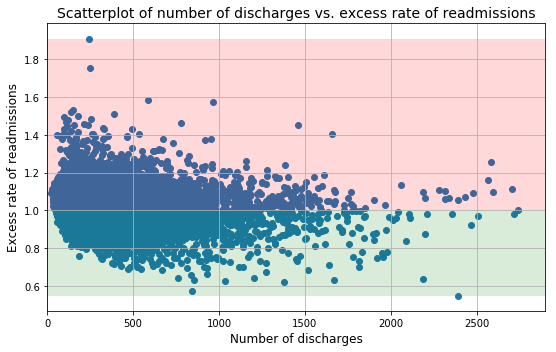

In [129]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = list(clean_hospital_read_df['Number of Discharges'][clean_hospital_read_df['Number of Discharges'] !=0].dropna())
y = list(clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Excess Readmission Ratio'] !=0].dropna())

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=1.0)

ax.fill_between([0,2900], 1.0, np.max(y), facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([0,2900], np.min(y), 1.0, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, 2900])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

>** Review of sections A & B**
- Relational associatations among data points should have been provided with a correalation score. However, the initial report does not provide statistical evidence but scatter plot. Looking at the Pearson correlation coefficient would suffice to understand if there is a relationship among data points. Initial report suggests that hospitals with smaller number of discharges tend to have higher excess readmission rates only by looking at the scatter plot which might be misleading. Instead, according to the results in the next two lines below:
   - The correlation is negative and almost zero. We do not have enough evidence to tell the two variables correlated with each other. Moreover, with this score, it's not obvious to see that with a lower number of discharges, there is a greater incidence of excess rate of readmissions or vice versa.
   - Hypothesis testing conducted in both Pearson's and Spearman correlation with the Null Hypothesis that there is no correlation between the number of discharges and the excess admission ratio. Observed p_value is highly significant, and so the null hypothesis H0 can be rejected. Thus this negative relationship between variables is statistically significant.
   

In [132]:
# Calculate a Pearson correlation coefficient and the p-value for testing non-correlation.
import scipy.stats as stats

# Pearson's correlation requires that each dataset be normally distributed
corr = stats.pearsonr(x,y)
print('The Pearson correlation coefficient: {}'.format(corr[0]))
print('The p-value of a two-tailed test: {}'.format(corr[1]))

The Pearson correlation coefficient: -0.09739794351079353
The p-value of a two-tailed test: 1.222547377680967e-25


In [135]:
# Calculate a Spearman rank-order correlation coefficient and the p-value to test 
# for non-correlation.
import scipy.stats as stats

# The Spearman correlation does not assume that both datasets are normally distributed.
corr2 = stats.spearmanr(x,y)
print('The Spearman correlation coefficient: {}'.format(corr2[0]))
print('The p-value of a two-tailed test: {}'.format(corr2[1]))

The Spearman correlation coefficient: -0.07712940537072743
The p-value of a two-tailed test: 1.2156459659603624e-16


>Consequently,  I would not assume that hospitals with a smaller number of discharges will always have a higher excess readmission ration as the correlation coefficient is too small. To verify I would suggest doing a Hyptohesis Testing of Two samples such that one group contains hospitals with less than 100 discharges and the other hospitals with 1000 or more discharges.

*Statistics*

In [137]:
# Discharges below 100
discharges_ex_bel_hund = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] < 100,
                          'Excess Readmission Ratio'].dropna()
mean_discharges_ex_bel_hund  =discharges_ex_bel_hund.mean()
ratio = len(discharges_ex_bel_hund[discharges_ex_bel_hund > 1])/(len(discharges_ex_bel_hund)/100)
print('The mean excess readmission rate for discharges below 100: ',mean_discharges_ex_bel_hund)
print('{} % have excess readmission rate greater than 1'.format(round(ratio,4)))

The mean excess readmission rate for discharges below 100:  1.0226183501683506
63.2155 % have excess readmission rate greater than 1


In [138]:
# Discharges above 10000
# Discharges below 100
discharges_ex_thsnd = clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] > 1000,
                          'Excess Readmission Ratio'].dropna()
mean_discharges_ex_thsnd  =discharges_ex_thsnd.mean()
ratio = len(discharges_ex_thsnd[discharges_ex_thsnd > 1])/(len(discharges_ex_thsnd)/100)
print('The mean excess readmission rate for discharges above 1000: ',mean_discharges_ex_thsnd)
print('{} % have excess readmission rate greater than 1'.format(round(ratio,4)))

The mean excess readmission rate for discharges above 1000:  0.9783354211663071
44.4924 % have excess readmission rate greater than 1


**Review of sections C & D **

**C. Conclusions**

+ Pearson's correlation test provided that there is not a strong correlation between hospital capacity ( number of discharges) and readmission rates. P_value from the test suggest that this low correlation is significant so we can reject the null hypothesis of non-correlation embeded in the test.
+ Given inference that Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions might be true but there might be some other factors as I will mention in the conclusion. Hence, it is not practical to assume that hospitals with smaller number of dischrages will always have a higher excess readmission rates.

**D. Regulatory policy recommendations**
+ I will not recommend that hospitals with smaller capacity be required to upgrade their resources or facilities.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

## Solutions for the Questions in the Exercises Section 

>We observed that our sample means are different from each other which supports the assertion made in the prelimanry report. Moreover, we are only looking at the samples that fall either below 100 or above 1000 and this may cause a sampling error. Due this error one might think that hospitals with lower discharge rates have higher readmission rates. So we could use Two Sample T-Test to check if this result is statistically significant meaning it is not observed out of luck!


“Statistical significance helps quantify whether a result is likely due to chance or to some factor of interest,” says Redman. When a finding is significant, it simply means you can feel confident that’s it real, not that you just got lucky (or unlucky) in choosing the sample. [Source](https://hbr.org/2016/02/a-refresher-on-statistical-significance)

**Null Hypothesis**: For our two samples there is no difference in the sample mean excess readmission rates:

$$H_0: \hat \mu_{100} - \hat \mu_{1000} = 0$$
    
**Alternative Hypothesis**: There is a significant difference in the sample means:

$$H_0: \hat \mu_{100} - \hat \mu_{1000} \neq 0$$
    
**Significance Level**: 99% Confidence:

$$\alpha = 0.01$$

In [142]:
print(len(discharges_ex_bel_hund))
print(len(discharges_ex_thsnd))

# Since the size of the samples are different we take the parameter equal_var = False
# Using Stats pakcage
stats.ttest_ind(discharges_ex_bel_hund.sample(n=463), discharges_ex_thsnd, equal_var=True)

1188
463


Ttest_indResult(statistic=7.425331181134489, pvalue=2.5540459435729716e-13)

In [141]:
# OR we can randomly take samples of size of the other sample from the large sample
# set parameter as True
stats.ttest_ind(discharges_ex_bel_hund.sample(n=463, replace=True), discharges_ex_thsnd, equal_var=True)

Ttest_indResult(statistic=6.890473374226111, pvalue=1.0281387313869005e-11)

In [143]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    se1, se2 = stats.sem(data1), stats.sem(data2)
    #se1 = np.std(discharges_ex_bel_hund)/(np.sqrt(len(discharges_ex_bel_hund)))
    #se2 = np.std(discharges_ex_thsnd)/(np.sqrt(len(discharges_ex_thsnd)))
    # standard error on the difference between the samples
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = stats.t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1-stats.t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p, alpha

t_stat, df, cv, p, alpha = independent_ttest(discharges_ex_bel_hund.sample(463,replace=True), discharges_ex_thsnd, alpha=0.01)
print('t=%.3f, df=%d, cv=%.3f, p=%.7f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('REJECT! the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('REJECT! the null hypothesis that  the means are equal.')

t=6.850, df=924, cv=2.330, p=0.0000000
REJECT! the null hypothesis that the means are equal.
REJECT! the null hypothesis that  the means are equal.


> Based on the test results we are confident that the difference between the two samples are not 0. This suggests that hospitals with low discharge rates tend to have higher 63% vs 44% excessive readmission ratios. However sample sizes are not equal!


> But these statistical calculations are not enough. There may be other variables such as the experince of the doctors and staff at each group of hospitals or the the distance of the hospitals from the rural area and policies of the hospitals in our data could have an effect on conclusions.

>Also, hospitals are not unique in this data so we do not know if the discharge policy of hospital affected the results. For instance, if one of the hospitals is not in favor of lowering the excessive readmission rates, and we have many data from that particular hospital then this definitely cause a change in the sample mean.

**Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?**

>Definitions: 

>Statistical significance refers to lesser chance of sampling error affecting the mean-differences. Statistical significance comes from within the data used and confidence of the analyst in the result. In other words, statistical significance reflects the low probability that an observed data has been arrived at by chance.

>Statistical significance refers to the unlikelihood that the result is obtained by chance, i.e., probability of relationship between two variables exists. Practical significance refers to the relationship between the variables and the real world situation.

>Statistical significance depends upon the sample size, practical significance depends upon external factors like cost, time, objective, etc.

>Statistical significance does not guarantee practical significance, but to be practically significant, a data must be statistically significant.




Read more: Difference Between Statistical significance and Practical significance | Difference Between http://www.differencebetween.net/science/mathematics-statistics/difference-between-statistical-significance-and-practical-significance/#ixzz5W8tTv0lY

**What are the advantages and disadvantages of using this plot to convey information?**

>Scatter plots are good for visulizing relationship between continuous variables but without a sound statistical analysis it is not appropriate to reach out the conclusion from scatter plots. 

**Construct another plot that conveys the same information in a more direct manner**

To have a better view of the data and to draw the outliers closer to the median, we can use the logarithm of the number of discharges instead. We will also use a density plot to reveal more information about the distribution of hospitals in terms of the number of discharges and excess readmission ratio.

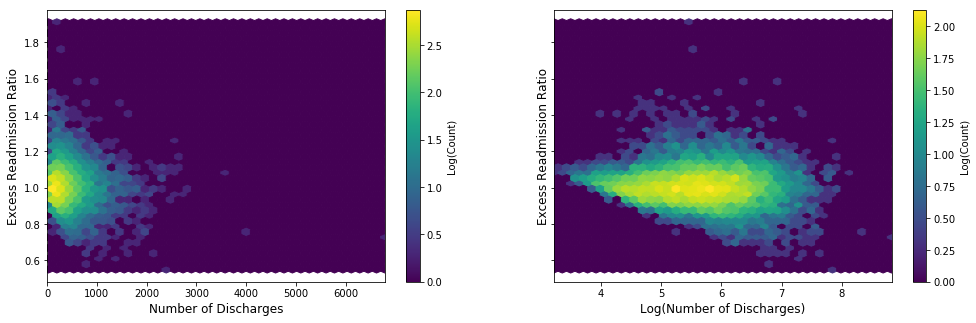

In [144]:
# Create a hexbin plot to show the density of observations
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=40, bins='log')
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of Discharges', fontsize=12)
ax.set_ylabel('Excess Readmission Ratio', fontsize=12)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Log(Count)')

logx = np.log(x)
ax = axs[1]
hb = ax.hexbin(logx, y, gridsize=40, bins='log')
ax.set_xlim([min(logx), max(logx)])
ax.set_xlabel('Log(Number of Discharges)', fontsize=12)
ax.set_ylabel('Excess Readmission Ratio', fontsize=12)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Log(Count)')

Text(0.5,1,'Excess rate of readmissions for small (<100 discharges) and large (>100) facilities')

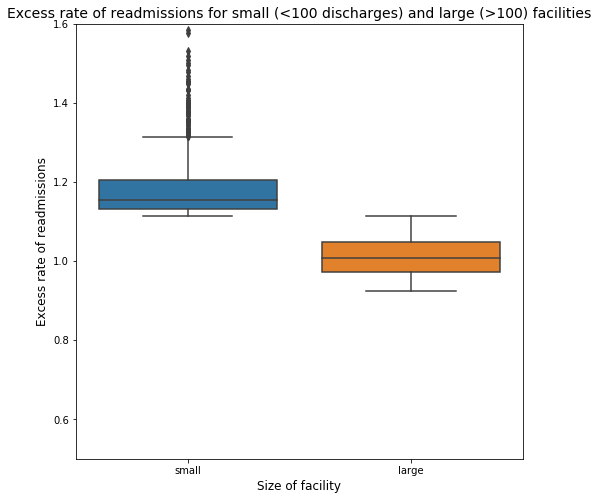

In [196]:
values = ['small' if discharges < 100 else 'large' for discharges in clean_hospital_read_df['Number of Discharges']]
dframe = pd.DataFrame(values,columns=['size'])
dframe = pd.concat([dframe['size'], clean_hospital_read_df['Excess Readmission Ratio']], axis=1)

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.boxplot(x='size', y='Excess Readmission Ratio', data = dframe)
#ax = sns.swarmplot(x= 'size', y='Excess Readmission Ratio', data = dframe)
ax.set_ylim([0.5, 1.6])
ax.set_xlabel('Size of facility', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Excess rate of readmissions for small (<100 discharges) and large (>100) facilities', fontsize=14)